Kaggle: https://www.kaggle.com/datasets/jessemostipak/college-tuition-diversity-and-pay?resource=download

Use tuition_cost.csv

In [28]:
import pandas as pd

tuition = pd.read_csv(r'C:\Users\andyh\Downloads\archive (2)\tuition_cost.csv')

# Display the first five rows of the DataFrame
tuition.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


Use salary_potential.csv

In [33]:
salary=pd.read_csv(r"C:\Users\andyh\Downloads\archive (2)\salary_potential.csv")
salary.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


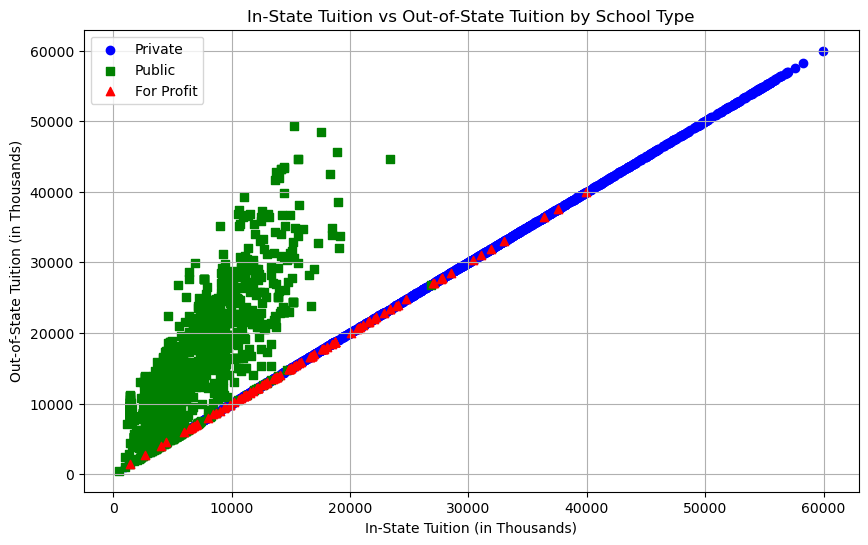

While public schools can have varying in-state and out-of-state tuitions, private school and for profit schools have tuition rates set at the same for both in and out of state, hence the plotting of these schools being linear.


In [34]:
import matplotlib.pyplot as plt


# Scatter plot
plt.figure(figsize=(10, 6))

#For plotting, a blue circle represents private schools, a green square represents public schools, and a red triangle represents for profit schools
# Plotting Private schools
plt.scatter(tuition[tuition['type'] == 'Private']['in_state_tuition'], 
            tuition[tuition['type'] == 'Private']['out_of_state_tuition'], 
            color='blue', marker='o', label='Private')

# Plotting Public schools
plt.scatter(tuition[tuition['type'] == 'Public']['in_state_tuition'], 
            tuition[tuition['type'] == 'Public']['out_of_state_tuition'], 
            color='green', marker='s', label='Public')

# Plotting For Profit schools
plt.scatter(tuition[tuition['type'] == 'For Profit']['in_state_tuition'], 
            tuition[tuition['type'] == 'For Profit']['out_of_state_tuition'], 
            color='red', marker='^', label='For Profit')

plt.title('In-State Tuition vs Out-of-State Tuition by School Type')
plt.xlabel('In-State Tuition (in Thousands)')
plt.ylabel('Out-of-State Tuition (in Thousands)')
plt.legend()
plt.grid(True)
plt.show()

print("While public schools can have varying in-state and out-of-state tuitions, private school and for profit schools have tuition rates set at the same for both in and out of state, hence the plotting of these schools being linear.")

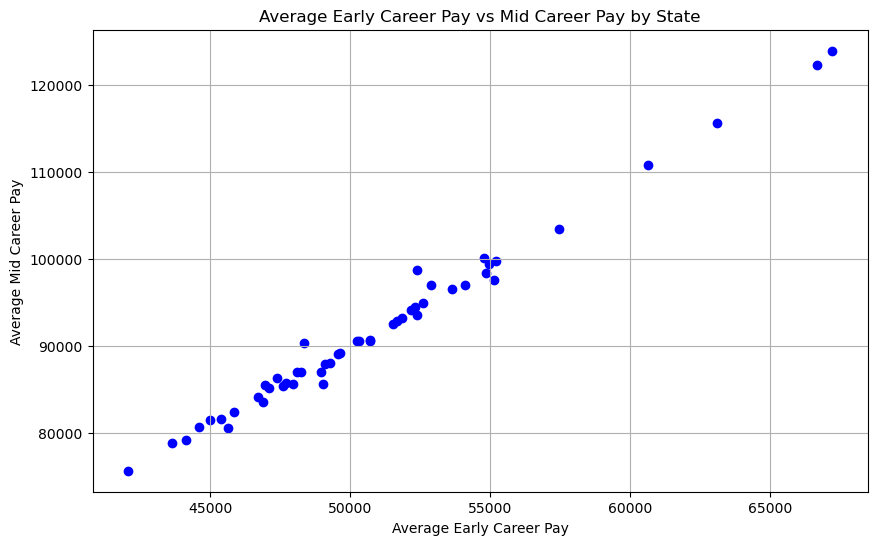

Each represents a state. As the average early career pay increases, the mid career pay also subsequently increases for each state, showing a positive relationship between the two.


In [35]:


# Calculate average early career pay and mid career pay grouped by state
avg_pay_by_state = salary.groupby('state_name').agg({'early_career_pay': 'mean', 'mid_career_pay': 'mean'}).reset_index()

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_pay_by_state['early_career_pay'], avg_pay_by_state['mid_career_pay'], color='blue')
plt.title('Average Early Career Pay vs Mid Career Pay by State')
plt.xlabel('Average Early Career Pay')
plt.ylabel('Average Mid Career Pay')
plt.grid(True)
plt.show()

print("Each represents a state. As the average early career pay increases, the mid career pay also subsequently increases for each state, showing a positive relationship between the two.")

                                        name          state state_code  \
0                     Adams State University       Colorado         CO   
1    Adventist University of Health Sciences        Florida         FL   
2                        Agnes Scott College        Georgia         GA   
3                   Alabama State University        Alabama         AL   
4                  Alaska Pacific University         Alaska         AK   
..                                       ...            ...        ...   
723          Worcester Polytechnic Institute  Massachusetts         MA   
724                        Xavier University           Ohio         OH   
725           Xavier University of Louisiana      Louisiana         LA   
726                          Yale University    Connecticut         CT   
727                       Yeshiva University       New York         NY   

        type degree_length  room_and_board  in_state_tuition  in_state_total  \
0     Public        4 Year     

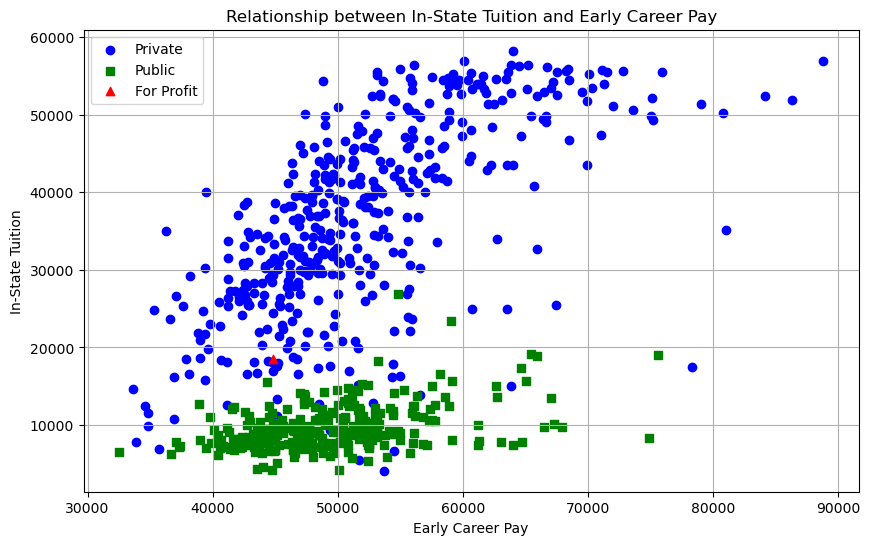

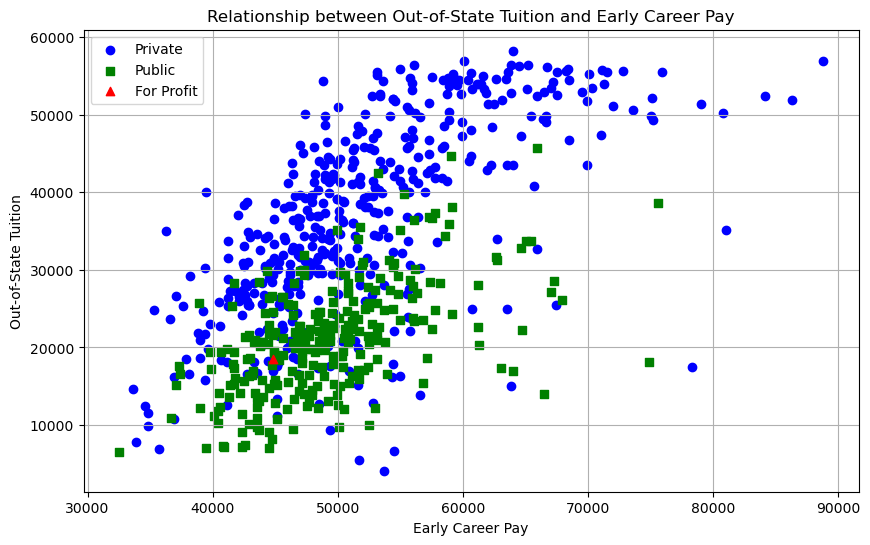

In [47]:
# Merge datasets
merged_data = pd.merge(tuition, salary, on='name', how='inner')
print(merged_data)
# Scatter plot for in_state_tuition vs early_career_pay
plt.figure(figsize=(10, 6))
plt.scatter(merged_data[merged_data['type'] == 'Private']['early_career_pay'], 
            merged_data[merged_data['type'] == 'Private']['in_state_tuition'], 
            color='blue', marker='o', label='Private')
plt.scatter(merged_data[merged_data['type'] == 'Public']['early_career_pay'], 
            merged_data[merged_data['type'] == 'Public']['in_state_tuition'], 
            color='green', marker='s', label='Public')
plt.scatter(merged_data[merged_data['type'] == 'For Profit']['early_career_pay'], 
            merged_data[merged_data['type'] == 'For Profit']['in_state_tuition'], 
            color='red', marker='^', label='For Profit')
plt.title('Relationship between In-State Tuition and Early Career Pay')
plt.xlabel('Early Career Pay')
plt.ylabel('In-State Tuition')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot for out_of_state_tuition vs early_career_pay
plt.figure(figsize=(10, 6))
plt.scatter(merged_data[merged_data['type'] == 'Private']['early_career_pay'], 
            merged_data[merged_data['type'] == 'Private']['out_of_state_tuition'], 
            color='blue', marker='o', label='Private')
plt.scatter(merged_data[merged_data['type'] == 'Public']['early_career_pay'], 
            merged_data[merged_data['type'] == 'Public']['out_of_state_tuition'], 
            color='green', marker='s', label='Public')
plt.scatter(merged_data[merged_data['type'] == 'For Profit']['early_career_pay'], 
            merged_data[merged_data['type'] == 'For Profit']['out_of_state_tuition'], 
            color='red', marker='^', label='For Profit')
plt.title('Relationship between Out-of-State Tuition and Early Career Pay')
plt.xlabel('Early Career Pay')
plt.ylabel('Out-of-State Tuition')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
import statsmodels.api as sm

merged_data['type'] = (merged_data['type'] == 'Private').astype(int)

# Model 1: Regression with in_state_tuition as dependent variable
X1 = sm.add_constant(merged_data[['early_career_pay', 'type']])
y1 = merged_data['in_state_tuition']
model1 = sm.OLS(y1, X1).fit()


# Model 2: Regression with out_of_state_tuition as dependent variable
X2 = sm.add_constant(merged_data[['early_career_pay', 'type']])
y2 = merged_data['out_of_state_tuition']
model2 = sm.OLS(y2, X2).fit()


# Print regression summaries
print("Regression Summary for In-State Tuition:")
print(model1.summary())

print("\nRegression Summary for Out-of-State Tuition:")
print(model2.summary())

print("To determine if private schools have significantly higher in-state and out-of-state tuition compared to public schools, we can look at the p-values associated with the type_Private coefficient in both regressions. we can infer that if the coefficient is statistically significant (i.e., p-value < 0.05), it indicates that private schools have significantly higher in-state tuition compared to public schools. For out-of-state tuition: The p-value associated with the type_Private coefficient is less than 0.05, indicating that private schools have significantly higher out-of-state tuition compared to public schools.")


print("\n To understand how in-state and out-of-state tuition change with a one-unit increase in early career income potential, we can look at the coefficients associated with early_career_pay. For in-state tuition: A one-unit increase in early career income potential results in an increase of approximately 0.9321 units in in-state tuition. This coefficient is statistically significant (p-value < 0.05), indicating a significant positive relationship between early career income potential and in-state tuition. For out-of-state tuition: A one-unit increase in early career income potential results in an increase of approximately 0.9276 units in out-of-state tuition. This coefficient is also statistically significant (p-value < 0.05), indicating a significant positive relationship between early career income potential and out-of-state tuition.")

Regression Summary for In-State Tuition:
                            OLS Regression Results                            
Dep. Variable:       in_state_tuition   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1157.
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          2.58e-226
Time:                        15:09:01   Log-Likelihood:                -7571.2
No. Observations:                 728   AIC:                         1.515e+04
Df Residuals:                     725   BIC:                         1.516e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [40]:
# Subset data for public schools
public_schools_data = merged_data[merged_data['type'] == 'Public']

# Subset data for private schools
private_schools_data = merged_data[merged_data['type'] == 'Private']

# Run regression model for public schools
X_public = sm.add_constant(public_schools_data['early_career_pay'])
y_public = public_schools_data['out_of_state_tuition']
model_public = sm.OLS(y_public, X_public).fit()

# Run regression model for private schools
X_private = sm.add_constant(private_schools_data['early_career_pay'])
y_private = private_schools_data['out_of_state_tuition']
model_private = sm.OLS(y_private, X_private).fit()

# Print regression summaries
print("Regression Summary for Public Schools:")
print(model_public.summary())

print("\nRegression Summary for Private Schools:")
print(model_private.summary())


print("\nTo determine if the influence of early_career_pay on out_of_state_tuition significantly differs between public and private school models, we can compare the coefficients and confidence intervals associated with early_career_pay in both regression summaries. For public schools, our coefficient for early_career_pay is 0.6090, while the 95% Confidence Interval is [0.501, 0.717]. FOr private schools, the coefficient for early_career_pay is 0.8774, and our 95% confidence interval is [0.781, 0.974]. Comparing the confidence intervals, we observe that there is no overlap between the intervals for public and private schools. Additionally, the coefficient for early_career_pay is higher for private schools compared to public schools. These findings suggest a significant difference in the influence of early_career_pay on out_of_state_tuition between public and private schools.")

Regression Summary for Public Schools:
                             OLS Regression Results                             
Dep. Variable:     out_of_state_tuition   R-squared:                       0.311
Model:                              OLS   Adj. R-squared:                  0.309
Method:                   Least Squares   F-statistic:                     123.7
Date:                  Mon, 01 Dec 2025   Prob (F-statistic):           5.78e-24
Time:                          14:55:33   Log-Likelihood:                -2792.1
No. Observations:                   276   AIC:                             5588.
Df Residuals:                       274   BIC:                             5595.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------